In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Train-1.csv')

# DATA DEFINITION AND EXPLORATION

In [3]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [4]:
# The data describes 400,000 Expresso clients.

# espresso is an african telecommunication company that provides customers with airtime and mobile data bundles.
# The objective of this data is to develop a predictive model 
# that determines the likelihood for a customer to churn 
# to stop purchasing airtime and data from Expresso.

In [5]:
# Variable Definitions	
# 	English
# 	The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.
# user_id	
# REGION	the location of each client
# TENURE	 duration in the network
# MONTANT	top-up amount
# FREQUENCE_RECH	Â number of times the customer refilled
# REVENUE	monthly income of each client
# ARPU_SEGMENT	income over 90 days / 3
# FREQUENCE	number of times the client has made an income
# DATA_VOLUME	number of connections
# ON_NET	inter expresso call
# ORANGE	call to orange
# TIGO	call to Tigo
# ZONE1	call to zones1
# ZONE2	call to zones2
# MRG	a client who is going
# REGULARITY	 number of times the client is active for 90 days
# TOP_PACK	 the most active packs
# FREQ_TOP_PACK	 number of times the client has activated the top pack packages
# CHURN	 variable to predict - Target


In [6]:
df.shape

(400000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [8]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [9]:
df.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.800385,0.979041,0.979041,0.781164,0.308343,0.327857,0.667531,0.427289,0.350551,0.407973,0.524157,0.742406,-0.106229
FREQUENCE_RECH,0.800385,1.000000,0.807405,0.807405,0.956262,0.165226,0.402383,0.522649,0.348092,0.126573,0.160979,0.557178,0.866833,-0.123113
REVENUE,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425376,0.355228,0.377622,0.534122,0.751785,-0.114822
ARPU_SEGMENT,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425377,0.355228,0.377623,0.534120,0.751785,-0.114822
FREQUENCE,0.781164,0.956262,0.791627,0.791627,1.000000,0.181491,0.392656,0.475057,0.311898,0.113051,0.164952,0.591314,0.843150,-0.139685
DATA_VOLUME,0.308343,0.165226,0.312915,0.312915,0.181491,1.000000,-0.014683,0.066746,0.029573,0.034982,0.054873,0.198813,0.126535,-0.036015
ON_NET,0.327857,0.402383,0.331850,0.331850,0.392656,-0.014683,1.000000,0.218051,0.138315,0.010337,-0.018135,0.268487,0.351834,-0.057701
ORANGE,0.667531,0.522649,0.670220,0.670220,0.475057,0.066746,0.218051,1.000000,0.408712,0.042190,0.016740,0.310284,0.557338,-0.063382
TIGO,0.427289,0.348092,0.425376,0.425377,0.311898,0.029573,0.138315,0.408712,1.000000,0.006882,0.015626,0.197842,0.375953,-0.035890
ZONE1,0.350551,0.126573,0.355228,0.355228,0.113051,0.034982,0.010337,0.042190,0.006882,1.000000,0.041978,0.042619,0.187581,0.019937


In [10]:
# from the correlation of the data, we seem to have a positive correlation from most of our datas

# DATA VISUALIZATION

In [11]:
df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [12]:
region = df.REGION.value_counts()

In [13]:
region

DAKAR          95517
THIES          33374
SAINT-LOUIS    22125
LOUGA          18513
KAOLACK        18042
DIOURBEL       12576
TAMBACOUNDA    10273
KAFFRINE        8181
KOLDA           7204
FATICK          6638
MATAM           5255
ZIGUINCHOR      4012
SEDHIOU          589
KEDOUGOU         181
Name: REGION, dtype: int64

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


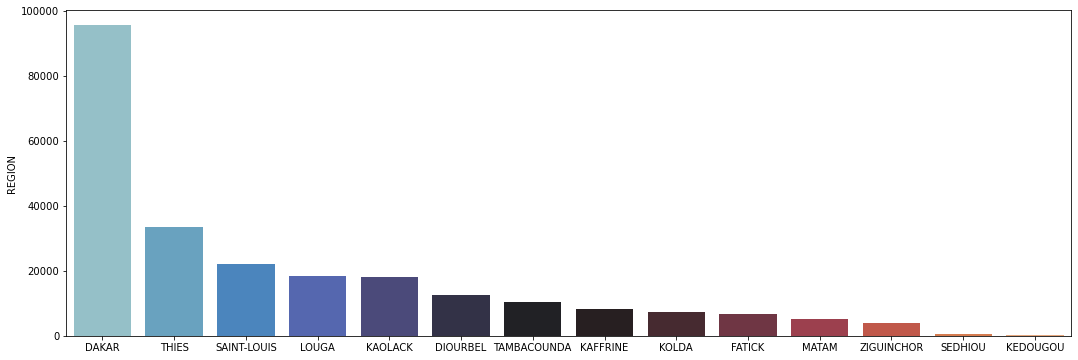

In [14]:
plt.figure(figsize=(18,6))
sns.barplot(region.index, region, palette='icefire');

In [15]:
tenure = df.TENURE.value_counts()

In [16]:
tenure

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


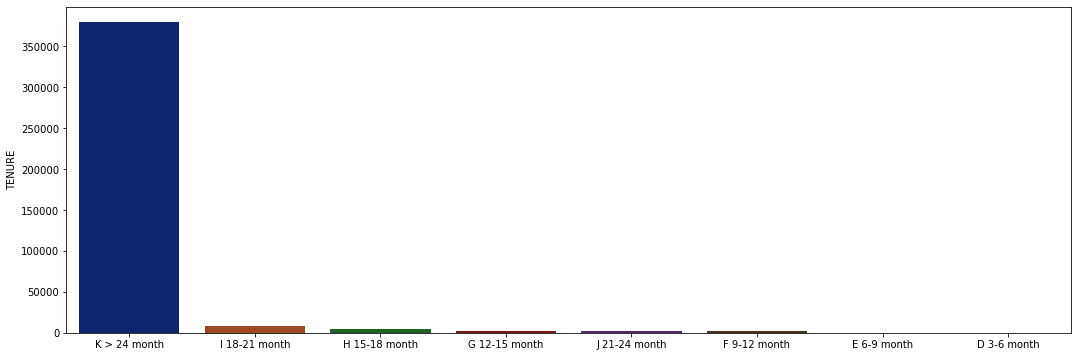

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(tenure.index, tenure, palette='dark');

In [18]:
toppack = df.TOP_PACK.value_counts()

In [19]:
toppack

All-net 500F=2000F;5d             58675
On net 200F=Unlimited _call24H    28387
Data:490F=1GB,7d                  21661
Data: 100 F=40MB,24H              15590
Mixt 250F=Unlimited_call24H       12712
                                  ...  
pilot_offer5                          1
Data:New-GPRS_PKG_1500F               1
pilot_offer6                          1
CVM_100F_unlimited                    1
EVC_MEGA10000F                        1
Name: TOP_PACK, Length: 111, dtype: int64

In [20]:
churn = df.CHURN.value_counts()

In [21]:
churn

0    325156
1     74844
Name: CHURN, dtype: int64

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


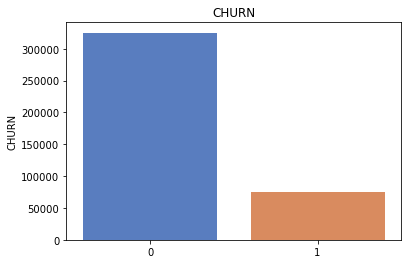

In [22]:
plt.title('CHURN')
sns.barplot(churn.index, churn, palette='muted');

In [23]:
# from the above churn chart, we can see that we have over 300000 clients who are likely to stay behind and less than 100000 who are likely to leave

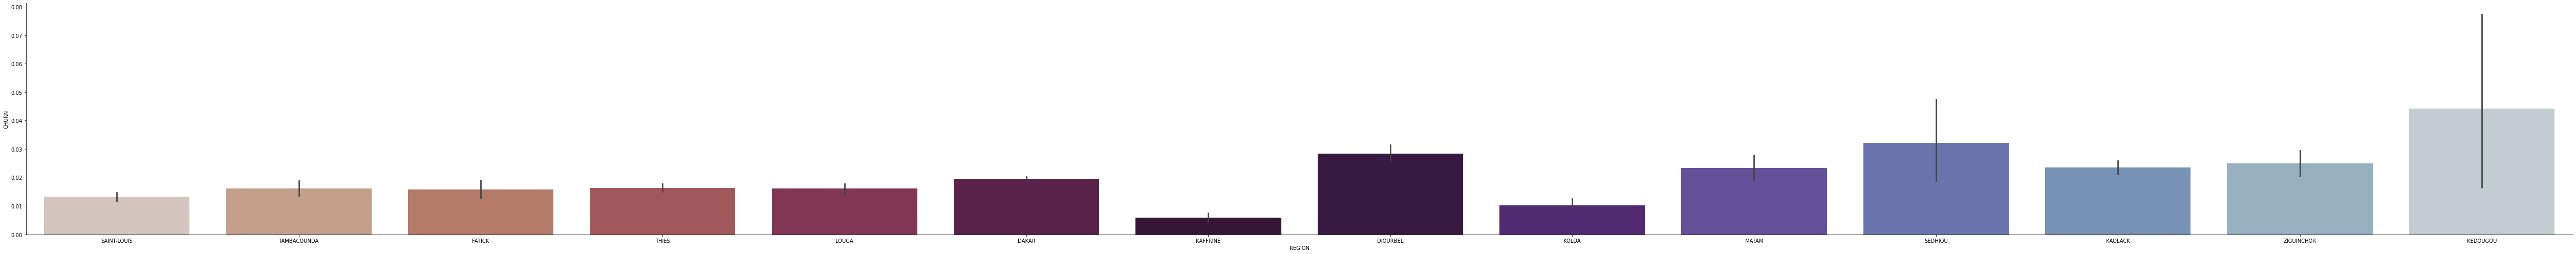

In [24]:
sns.catplot(x="REGION",
                y="CHURN",
                data=df, kind="bar",
                height=7, aspect=10, palette='twilight_r');

In [25]:
# predicting those who will leave based on their region is almost possible.

<Figure size 1296x432 with 0 Axes>

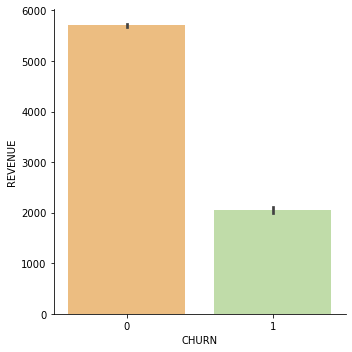

In [26]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="REVENUE",
                data=df, kind="bar", palette='Spectral');

In [27]:
# based on the revenue earned by each client, the chances of leaving to another service provider is quite low.

<Figure size 1296x432 with 0 Axes>

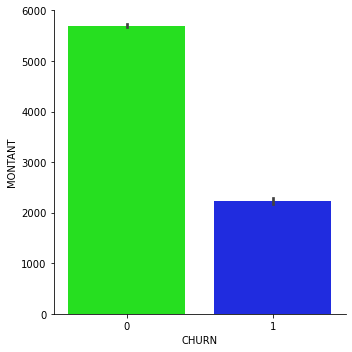

In [28]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="MONTANT",
                data=df, kind="bar", palette='hsv');

In [29]:
# going futher, i decided to check if it was possible to 
# leave based on the last top up amount by the client, but looking at the chart, 
# it is not a good determinant of clients who wil leave or stay back

<Figure size 1296x432 with 0 Axes>

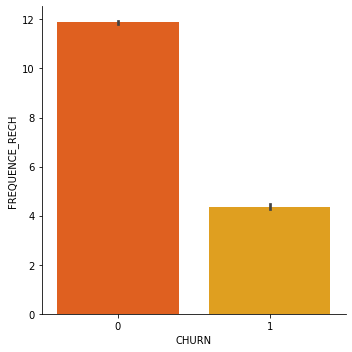

In [30]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="FREQUENCE_RECH",
                data=df, kind="bar", palette='autumn');

In [31]:
# looking at the number of times a customer refilled, we can see that majority of the clients will stay and very few will probably leave.

<Figure size 1296x432 with 0 Axes>

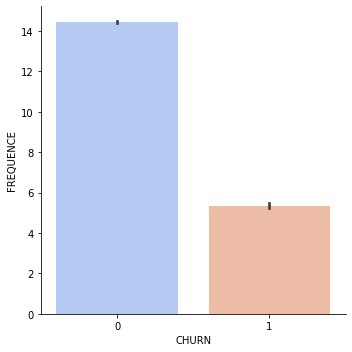

In [32]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="FREQUENCE",
                data=df, kind="bar", palette='coolwarm');

In [33]:
# predicting with the chart above, we have more people who will stay than leave. it's like, the higher the number of times
# they make an income, the higher their chances of staying.

<Figure size 1296x432 with 0 Axes>

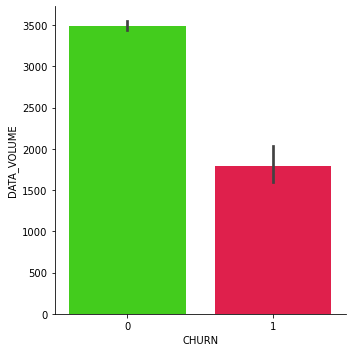

In [34]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="DATA_VOLUME",
                data=df, kind="bar", palette='prism');

In [35]:
# based on the number of connections, its a 50/50 thing, there are chances of clients leaving based on connections

<Figure size 1296x432 with 0 Axes>

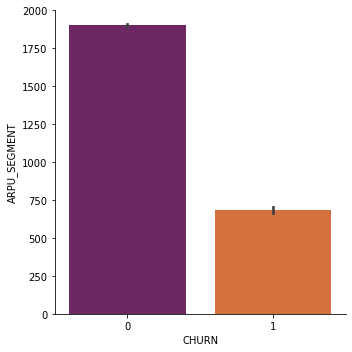

In [36]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="ARPU_SEGMENT",
                data=df, kind="bar", palette='inferno');

In [37]:
# based on their income over the last 3months, the chances of moving to a different service provider is slim.

<Figure size 1296x432 with 0 Axes>

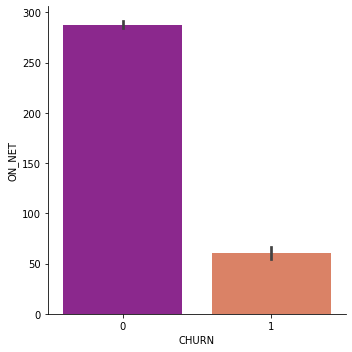

In [38]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="ON_NET",
                data=df, kind="bar", palette='plasma');

In [39]:
# this are calls made to the company itself probably for enquires about the product. clients having adequate information and access to the provider are likely not to leave

<Figure size 1296x432 with 0 Axes>

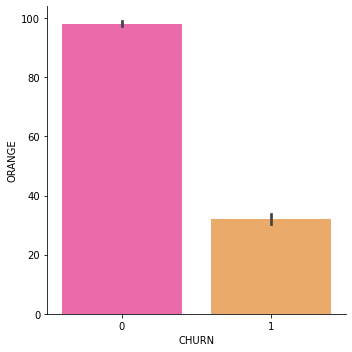

In [40]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="ORANGE",
                data=df, kind="bar", palette='spring');

In [41]:
# calls made to orange proves to not be a determinant why clients would leave.

<Figure size 1296x432 with 0 Axes>

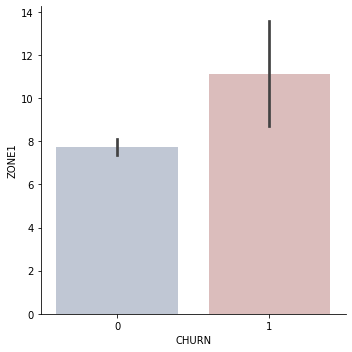

In [42]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="ZONE1",
                data=df, kind="bar", palette='vlag');

In [43]:
# looking at the calls made to zone1 we can tell that the company is likely to loose more clients to their competitors. this could be base on underlying factors. 

<Figure size 1296x432 with 0 Axes>

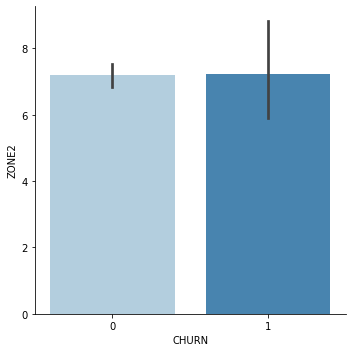

In [44]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="ZONE2",
                data=df, kind="bar", palette='Blues');

In [45]:
# call to zone 2 equally pose a threat to the success of the service provider. the chances of churning is equally high.

<Figure size 1296x432 with 0 Axes>

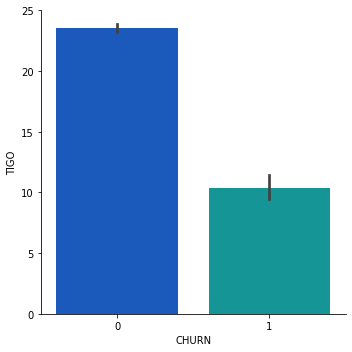

In [46]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="TIGO",
                data=df, kind="bar", palette='winter');

In [47]:
# calls to tigo is fair enough as w have clients who will probably stay

<Figure size 1296x432 with 0 Axes>

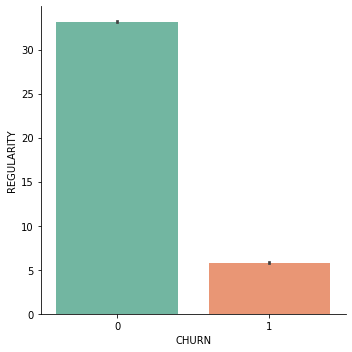

In [48]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="REGULARITY",
                data=df, kind="bar", palette='Set2');

In [49]:
# based on the number of times the client is active for 90 days, we have more clients who will stay than leave.

<Figure size 1296x432 with 0 Axes>

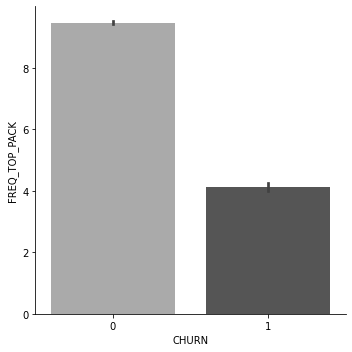

In [50]:
plt.figure(figsize=(18,6))
sns.catplot(x="CHURN",
                y="FREQ_TOP_PACK",
                data=df, kind="bar", palette='gist_yarg');

In [51]:
# The number of times they subscribed for the top packs isn't really a major determinant

# DATA CLEANING

<AxesSubplot:>

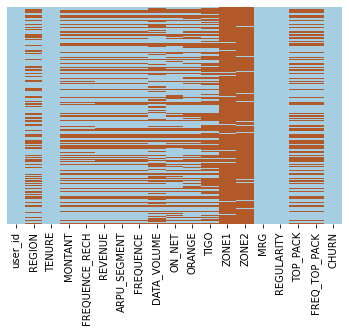

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Paired')

In [53]:
df.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.drop('user_id',axis=1, inplace=True)
df.drop('MRG',axis=1, inplace=True)
df.drop('ZONE1',axis=1, inplace=True)
df.drop('ZONE2',axis=1, inplace=True)
df.drop('TIGO',axis=1, inplace=True)
df.drop('TOP_PACK',axis=1, inplace=True)
df.drop('REGION',axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 0 to 399999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TENURE          400000 non-null  object 
 1   MONTANT         259723 non-null  float64
 2   FREQUENCE_RECH  259723 non-null  float64
 3   REVENUE         265337 non-null  float64
 4   ARPU_SEGMENT    265337 non-null  float64
 5   FREQUENCE       265337 non-null  float64
 6   DATA_VOLUME     203146 non-null  float64
 7   ON_NET          254181 non-null  float64
 8   ORANGE          233683 non-null  float64
 9   REGULARITY      400000 non-null  int64  
 10  FREQ_TOP_PACK   232671 non-null  float64
 11  CHURN           400000 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 39.7+ MB


In [57]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df['TENURE']=le.fit_transform(df['TENURE'])

In [58]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
0,7,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,62,35.0,0
1,7,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,40,22.0,0
2,7,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,32,3.0,0
3,7,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,18,3.0,0
4,7,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,50,NaN,0


In [59]:
tenure

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

In [60]:
tenure = df.TENURE.value_counts()

In [61]:
tenure

7    379439
5      8312
4      4858
3      2788
6      2325
2      1771
1       359
0       148
Name: TENURE, dtype: int64

In [62]:
# dealing with monetary values and amount, it will be ideal to use the mean

df['REVENUE'].fillna(value=df.REVENUE.mean(), inplace=True)
df['FREQUENCE'].fillna(value=df.FREQUENCE.mean(), inplace=True)
df['ARPU_SEGMENT'].fillna(value=df.ARPU_SEGMENT.mean(), inplace=True)
df['MONTANT'].fillna(value=df.MONTANT.mean(), inplace=True)

In [63]:
df['FREQUENCE_RECH'].fillna(method="ffill", inplace=True)
df['DATA_VOLUME'].fillna(method="ffill", inplace=True)
df['FREQ_TOP_PACK'].fillna(method="ffill", inplace=True)

In [64]:
df['ON_NET'].fillna(method="backfill", inplace=True)
df['ORANGE'].fillna(method="backfill", inplace=True)

In [65]:
df.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       1
ON_NET            2
ORANGE            1
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [66]:
df.fillna(0, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 0 to 399999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TENURE          400000 non-null  int32  
 1   MONTANT         400000 non-null  float64
 2   FREQUENCE_RECH  400000 non-null  float64
 3   REVENUE         400000 non-null  float64
 4   ARPU_SEGMENT    400000 non-null  float64
 5   FREQUENCE       400000 non-null  float64
 6   DATA_VOLUME     400000 non-null  float64
 7   ON_NET          400000 non-null  float64
 8   ORANGE          400000 non-null  float64
 9   REGULARITY      400000 non-null  int64  
 10  FREQ_TOP_PACK   400000 non-null  float64
 11  CHURN           400000 non-null  int64  
dtypes: float64(9), int32(1), int64(2)
memory usage: 38.1 MB


<AxesSubplot:>

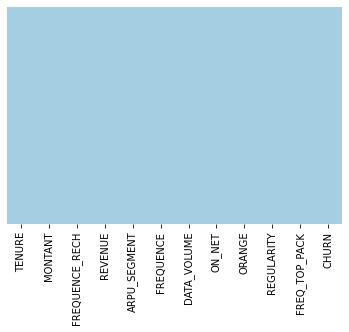

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Paired')

# PREDICTIVE MODELS

In [69]:
# SPLITING OF DATASET

from sklearn.model_selection import train_test_split

In [70]:
x = df[['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE',
        'REGULARITY', 'FREQ_TOP_PACK']]
y = df['CHURN']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1000)

In [72]:
x_train.shape

(280000, 11)

In [73]:
x_test.shape

(120000, 11)

## MODELLING WITH LOGISTIC REGRESSION

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression(C=10, max_iter=500)
logmodel.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=500)

In [76]:
predictions = logmodel.predict(x_test)

In [77]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
prob = logmodel.predict_proba(x_test)

In [79]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, auc

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     97450
           1       0.63      0.61      0.62     22550

    accuracy                           0.86    120000
   macro avg       0.77      0.76      0.77    120000
weighted avg       0.86      0.86      0.86    120000



## MODELLING WITH NAIVE BAYES

In [82]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [83]:
y_pred = classifier.predict(x_test)

In [84]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
prob = classifier.predict_proba(x_test)

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     97450
           1       0.63      0.61      0.62     22550

    accuracy                           0.86    120000
   macro avg       0.77      0.76      0.77    120000
weighted avg       0.86      0.86      0.86    120000



## MODELLING WITH RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [90]:
predictions = classifier.predict(x_test)

In [91]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
prob = classifier.predict_proba(x_test)

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])

In [94]:
y_pred = classifier.predict(x_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, auc

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     97450
           1       0.62      0.46      0.52     22550

    accuracy                           0.84    120000
   macro avg       0.75      0.70      0.72    120000
weighted avg       0.83      0.84      0.84    120000



## MODELLING WITH XGBOOST

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

In [98]:
predictions = xgboost.predict(x_test)

In [99]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
prob = xgboost.predict_proba(x_test)

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     97450
           1       0.65      0.55      0.60     22550

    accuracy                           0.86    120000
   macro avg       0.78      0.74      0.76    120000
weighted avg       0.85      0.86      0.86    120000



In [102]:
import catboost as ctb
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
ctb = catboost.fit(x_train, y_train)
y_pred = ctb.predict(x_test);

Learning rate set to 0.114254
0:	learn: 0.5756279	total: 978ms	remaining: 16m 17s
1:	learn: 0.5004498	total: 1.17s	remaining: 9m 44s
2:	learn: 0.4482748	total: 1.38s	remaining: 7m 40s
3:	learn: 0.4093124	total: 1.6s	remaining: 6m 39s
4:	learn: 0.3799031	total: 1.81s	remaining: 6m 1s
5:	learn: 0.3577663	total: 2.02s	remaining: 5m 35s
6:	learn: 0.3457624	total: 2.22s	remaining: 5m 14s
7:	learn: 0.3366180	total: 2.37s	remaining: 4m 54s
8:	learn: 0.3287677	total: 2.54s	remaining: 4m 39s
9:	learn: 0.3225051	total: 2.71s	remaining: 4m 28s
10:	learn: 0.3189266	total: 2.89s	remaining: 4m 19s
11:	learn: 0.3149821	total: 3.05s	remaining: 4m 10s
12:	learn: 0.3119324	total: 3.21s	remaining: 4m 3s
13:	learn: 0.3106148	total: 3.38s	remaining: 3m 57s
14:	learn: 0.3082064	total: 3.54s	remaining: 3m 52s
15:	learn: 0.3064229	total: 3.72s	remaining: 3m 49s
16:	learn: 0.3056613	total: 3.91s	remaining: 3m 46s
17:	learn: 0.3045227	total: 4.07s	remaining: 3m 42s
18:	learn: 0.3041140	total: 4.25s	remaining: 3

159:	learn: 0.2960324	total: 33s	remaining: 2m 53s
160:	learn: 0.2960079	total: 33.4s	remaining: 2m 53s
161:	learn: 0.2959901	total: 33.6s	remaining: 2m 53s
162:	learn: 0.2959689	total: 33.9s	remaining: 2m 54s
163:	learn: 0.2959425	total: 34.2s	remaining: 2m 54s
164:	learn: 0.2959228	total: 34.4s	remaining: 2m 54s
165:	learn: 0.2959066	total: 34.6s	remaining: 2m 53s
166:	learn: 0.2958846	total: 34.8s	remaining: 2m 53s
167:	learn: 0.2958574	total: 35s	remaining: 2m 53s
168:	learn: 0.2958351	total: 35.2s	remaining: 2m 53s
169:	learn: 0.2957921	total: 35.4s	remaining: 2m 52s
170:	learn: 0.2957693	total: 35.6s	remaining: 2m 52s
171:	learn: 0.2957462	total: 35.8s	remaining: 2m 52s
172:	learn: 0.2957153	total: 36s	remaining: 2m 52s
173:	learn: 0.2956930	total: 36.2s	remaining: 2m 51s
174:	learn: 0.2956646	total: 36.4s	remaining: 2m 51s
175:	learn: 0.2956395	total: 36.6s	remaining: 2m 51s
176:	learn: 0.2956172	total: 36.8s	remaining: 2m 50s
177:	learn: 0.2955878	total: 36.9s	remaining: 2m 50s

316:	learn: 0.2925734	total: 56.9s	remaining: 2m 2s
317:	learn: 0.2925580	total: 57s	remaining: 2m 2s
318:	learn: 0.2925376	total: 57.1s	remaining: 2m 1s
319:	learn: 0.2925160	total: 57.3s	remaining: 2m 1s
320:	learn: 0.2925003	total: 57.4s	remaining: 2m 1s
321:	learn: 0.2924829	total: 57.5s	remaining: 2m 1s
322:	learn: 0.2924697	total: 57.7s	remaining: 2m
323:	learn: 0.2924538	total: 57.8s	remaining: 2m
324:	learn: 0.2924315	total: 57.9s	remaining: 2m
325:	learn: 0.2924140	total: 58s	remaining: 2m
326:	learn: 0.2923928	total: 58.2s	remaining: 1m 59s
327:	learn: 0.2923758	total: 58.3s	remaining: 1m 59s
328:	learn: 0.2923585	total: 58.4s	remaining: 1m 59s
329:	learn: 0.2923467	total: 58.5s	remaining: 1m 58s
330:	learn: 0.2923364	total: 58.7s	remaining: 1m 58s
331:	learn: 0.2923208	total: 58.8s	remaining: 1m 58s
332:	learn: 0.2923086	total: 58.9s	remaining: 1m 58s
333:	learn: 0.2922974	total: 59.1s	remaining: 1m 57s
334:	learn: 0.2922690	total: 59.2s	remaining: 1m 57s
335:	learn: 0.29225

471:	learn: 0.2897580	total: 1m 19s	remaining: 1m 29s
472:	learn: 0.2897336	total: 1m 20s	remaining: 1m 29s
473:	learn: 0.2897272	total: 1m 20s	remaining: 1m 29s
474:	learn: 0.2897118	total: 1m 20s	remaining: 1m 28s
475:	learn: 0.2897003	total: 1m 20s	remaining: 1m 28s
476:	learn: 0.2896737	total: 1m 20s	remaining: 1m 28s
477:	learn: 0.2896545	total: 1m 20s	remaining: 1m 28s
478:	learn: 0.2896379	total: 1m 20s	remaining: 1m 28s
479:	learn: 0.2896193	total: 1m 21s	remaining: 1m 27s
480:	learn: 0.2896009	total: 1m 21s	remaining: 1m 27s
481:	learn: 0.2895807	total: 1m 21s	remaining: 1m 27s
482:	learn: 0.2895637	total: 1m 21s	remaining: 1m 27s
483:	learn: 0.2895464	total: 1m 21s	remaining: 1m 26s
484:	learn: 0.2895345	total: 1m 21s	remaining: 1m 26s
485:	learn: 0.2895200	total: 1m 21s	remaining: 1m 26s
486:	learn: 0.2895093	total: 1m 21s	remaining: 1m 26s
487:	learn: 0.2894981	total: 1m 22s	remaining: 1m 26s
488:	learn: 0.2894790	total: 1m 22s	remaining: 1m 25s
489:	learn: 0.2894599	total:

625:	learn: 0.2873548	total: 1m 46s	remaining: 1m 3s
626:	learn: 0.2873408	total: 1m 46s	remaining: 1m 3s
627:	learn: 0.2873186	total: 1m 46s	remaining: 1m 3s
628:	learn: 0.2873003	total: 1m 46s	remaining: 1m 2s
629:	learn: 0.2872864	total: 1m 46s	remaining: 1m 2s
630:	learn: 0.2872656	total: 1m 46s	remaining: 1m 2s
631:	learn: 0.2872438	total: 1m 47s	remaining: 1m 2s
632:	learn: 0.2872220	total: 1m 47s	remaining: 1m 2s
633:	learn: 0.2872052	total: 1m 47s	remaining: 1m 2s
634:	learn: 0.2871888	total: 1m 47s	remaining: 1m 1s
635:	learn: 0.2871739	total: 1m 47s	remaining: 1m 1s
636:	learn: 0.2871590	total: 1m 48s	remaining: 1m 1s
637:	learn: 0.2871483	total: 1m 48s	remaining: 1m 1s
638:	learn: 0.2871331	total: 1m 48s	remaining: 1m 1s
639:	learn: 0.2871154	total: 1m 48s	remaining: 1m 1s
640:	learn: 0.2871010	total: 1m 48s	remaining: 1m 1s
641:	learn: 0.2870819	total: 1m 49s	remaining: 1m
642:	learn: 0.2870655	total: 1m 49s	remaining: 1m
643:	learn: 0.2870470	total: 1m 49s	remaining: 1m
64

782:	learn: 0.2849468	total: 2m 17s	remaining: 38.1s
783:	learn: 0.2849322	total: 2m 17s	remaining: 38s
784:	learn: 0.2849259	total: 2m 18s	remaining: 37.8s
785:	learn: 0.2849121	total: 2m 18s	remaining: 37.6s
786:	learn: 0.2848969	total: 2m 18s	remaining: 37.4s
787:	learn: 0.2848853	total: 2m 18s	remaining: 37.3s
788:	learn: 0.2848738	total: 2m 18s	remaining: 37.1s
789:	learn: 0.2848588	total: 2m 18s	remaining: 36.9s
790:	learn: 0.2848456	total: 2m 18s	remaining: 36.7s
791:	learn: 0.2848367	total: 2m 18s	remaining: 36.5s
792:	learn: 0.2848229	total: 2m 19s	remaining: 36.3s
793:	learn: 0.2848140	total: 2m 19s	remaining: 36.1s
794:	learn: 0.2847993	total: 2m 19s	remaining: 35.9s
795:	learn: 0.2847792	total: 2m 19s	remaining: 35.8s
796:	learn: 0.2847616	total: 2m 19s	remaining: 35.6s
797:	learn: 0.2847389	total: 2m 19s	remaining: 35.4s
798:	learn: 0.2847208	total: 2m 19s	remaining: 35.2s
799:	learn: 0.2847045	total: 2m 20s	remaining: 35s
800:	learn: 0.2846967	total: 2m 20s	remaining: 34.

939:	learn: 0.2826447	total: 2m 41s	remaining: 10.3s
940:	learn: 0.2826298	total: 2m 41s	remaining: 10.1s
941:	learn: 0.2826130	total: 2m 41s	remaining: 9.96s
942:	learn: 0.2825972	total: 2m 41s	remaining: 9.78s
943:	learn: 0.2825898	total: 2m 41s	remaining: 9.61s
944:	learn: 0.2825772	total: 2m 42s	remaining: 9.43s
945:	learn: 0.2825665	total: 2m 42s	remaining: 9.26s
946:	learn: 0.2825555	total: 2m 42s	remaining: 9.09s
947:	learn: 0.2825422	total: 2m 42s	remaining: 8.91s
948:	learn: 0.2825327	total: 2m 42s	remaining: 8.74s
949:	learn: 0.2825150	total: 2m 42s	remaining: 8.56s
950:	learn: 0.2825020	total: 2m 42s	remaining: 8.39s
951:	learn: 0.2824825	total: 2m 42s	remaining: 8.22s
952:	learn: 0.2824668	total: 2m 43s	remaining: 8.04s
953:	learn: 0.2824617	total: 2m 43s	remaining: 7.87s
954:	learn: 0.2824492	total: 2m 43s	remaining: 7.7s
955:	learn: 0.2824343	total: 2m 43s	remaining: 7.53s
956:	learn: 0.2824168	total: 2m 43s	remaining: 7.35s
957:	learn: 0.2824037	total: 2m 43s	remaining: 

In [103]:
predictions = ctb.predict(x_test)

In [104]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
prob = ctb.predict_proba(x_test)

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     97450
           1       0.65      0.55      0.60     22550

    accuracy                           0.86    120000
   macro avg       0.78      0.74      0.76    120000
weighted avg       0.85      0.86      0.86    120000

